In [2]:
from utils import *

## 1.Hyperparameter

In [1]:
input_size = 1
hidden_size = 64
num_layers = 1
output_size = 1
seq_len = 10   # 预测序列长度
epoch = 500
learning_rate = 0.001

## 2.predict

In [7]:
test_battery_id = 'B0005'
test_data,test_data_real = data_loader(test_battery_id,seq_len,input_size)
input_data = torch.tensor(test_data, dtype=torch.float32)
# load
lstm = LSTMModel(input_size=input_size, hidden_size=hidden_size, output_size=output_size, num_layers=num_layers)
lstm.load_state_dict(torch.load('lstm_model.pth'))
lstm.eval()
output = lstm(input_data)
predicted_data = output.detach().numpy()
# print(output.shape)

# # save
# predicted_soh = pd.DataFrame(data=output.detach().numpy(), columns=['SOH'])
# predicted_soh.to_csv("../datasets/BatteryCSV/{}output.csv".format(test_battery_id), index=False)

torch.Size([158, 1])


## 3.plot

Text(0.5, 1.0, 'Discharge B0005')

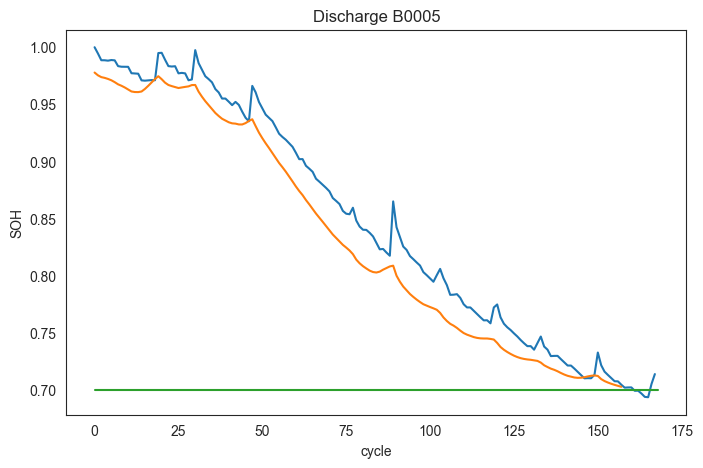

In [8]:
# draw
origin_data = norm_data(test_battery_id)
sns.set_style("white")
plt.figure(figsize=(8, 5))
#Draw
plt.plot([i for i in range(len(origin_data['SOH']))], origin_data['SOH'], label='SOH')
plt.plot([i for i in range(len(test_data))], predicted_data, label='Predicted SOH')
plt.plot([0.,len(origin_data['SOH'])], [0.70, 0.70], label='Threshold')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.ylabel('SOH')
plt.title('Discharge {}'.format(test_battery_id))